## Part 1

### (1) Describe how to access data, where it is stored, who curates it. Make sure to use the original source and curator in addition to the NBER site to which I have linked.

The data can be accessed through the National Bureau of Economic Research which obtains the data from the United States Census Bureau. The Current Population Survey is sponsored both by the U.S. Census Bureau and the Bureau of Labor Statistics. Specifically, on the main page the Current Population Survey (CPS) website, you must click 'View All Data' under the 'Data' tab. Then, scrolling down to 'DataWeb FTP' link, clicking that link will bring you to a page where the CPS data by month is stored and available for download. 

### (2) Cite other key papers that have used this data.

Several studies utilize the Current Population Survey in their research. Mellor and Milyo (2002) utilize CPS data to study the impacts of income inequality on individuals health status. Burkhauser, Couch, and Wittenburg (2000) also use the CPS to assess the impacts of federal minimum wage increases on employment rates. Finally, there have been several studies on the geography of smokers in the United States that utilize the CPS including Auguston and Marcus (2004) as well as Shopland, et al. (1996).

### (3) Describe how the data were collected.

Each month some 60,000 U.S. households are surveyed by the the Census Bureau and Bureau of Labor Statistics. According to the Technical Documentation released by these two agencies on the CPS, the CPS sample "is selected from lists of addresses obtained from the Master Address File with updates from the United States Postal Service twice a year." First, Primary Sampling Units (PSUs) are selected - these are counties or groups of contiguous counties. Within these PSUs, households "are sorted based on characteristics from the American Community Survey and geography" and then specific households are then selected to be surveyed. 

### Importing the data

In [273]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [274]:
cps = pd.read_csv('jun_17_cps.csv')

/Users/kevinsun/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (5,14,33,34,37,70,72,87,111,112,113,114,115,116,119,124,125,126,127,128,129,130,131,132,133,134,140,144,153,155,156,160,161,181,183,355,356,382,384,385,386) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### (4) Include a table that gives descriptive statistics for at least 8 key variables.

We can observe the numerical summaries for the following variables in the table below:

hrmonth = month of survey <br />
hryear4 = year of survey <br />
hrnumhou = total # of persons living in household <br />
huprscnt = number of actual and attempted phone calls <br />
peernhl0 = hourly rate of pay <br />
prernwa = weekly rate of pay <br />
peern = calculated weekly overtime pay <br />
premp = reason not at work <br />
puhrot2 = # of additional overtime hours worked <br />
pehractt = hours worked last week (main job and other) <br />


In [275]:
cols_num = ['hrmonth','hryear4','hrnumhou','huprscnt',\
            'peernh1o', 'prernwa', 'peern', 'premp', \
            'puhrot2', 'pehractt']
cps_numeric = cps[cols_num]
cps_numeric.describe()

,hrmonth,hryear4,hrnumhou,huprscnt,peernh1o,prernwa,peern,premp,puhrot2,pehractt
count,148054.0,148054.0,148054.000000,148054.000000,5989.00000,13470.000000,800.000000,148054.000000,148054.000000,148054.000000
mean,6.0,2017.0,2.858498,0.633857,16.58289,935.669806,217.358450,-0.206546,-0.739278,14.451599
std,0.0,0.0,1.873351,0.946577,9.05162,675.809701,260.890046,0.978440,2.082963,21.104730
min,6.0,2017.0,0.000000,0.000000,1.12000,0.000000,0.000000,-1.000000,-3.000000,-1.000000
25%,6.0,2017.0,2.000000,0.000000,10.50000,450.000000,50.000000,-1.000000,-1.000000,-1.000000
50%,6.0,2017.0,3.000000,0.000000,14.00000,750.000000,135.000000,-1.000000,-1.000000,-1.000000
75%,6.0,2017.0,4.000000,1.000000,20.00000,1230.760000,275.000000,1.000000,-1.000000,40.000000
max,6.0,2017.0,15.000000,9.000000,90.00000,2884.610000,1800.000000,1.000000,84.000000,150.000000


### (5) Include at least one key visualization of the data that exhibits an interesting characteristic (6) Show at least one conditional (slice) description of the data (e.g., all variable descriptive statistics by nationality of survey respondent). 

Using this dataset, we are able to create visualizations to map the relationship between several variables. 

In Figure 1, we are able to see the relationship between an individual's marital status and their self-reported hourly wage. We can observe two major trends in that one, married individuals, regardless of their sex earn more than their same-sex counterparts; secondly and less surprisingly, females earn less than males across all categories or marital status.

In Figure 2, we plot the relationship between the number of hours an individual reported to work last week and their hourly wage; and we also plot the regression line for both females and males. From this we can confirm that for individuals who work full-time or more, there continues to be a gap in hourly wages between males and females. However, this average wage gap is not constant across number of hours worked. In fact, the gap increases as hours worked increases. Finally, perhaps a counterintuitive insight we can glean from this visualization is that on average, for females working part-time (roughly 0-10 hours per week), they actually earn more than their male counterparts. 

Figure 3 represents the same data as Figure 2, but the relationship between Hourly Wage and Hours Worked Last Week is separated out into two graphs based on sex of the individual. 

In [283]:
cps_new = cps[['peeduca', 'pemaritl', 'pesex', 'ptdtrace', \
               'prhrusl', 'peernh1o', 'pehractt']]
cps_new.replace("-1", "No Response", inplace=True)
cps_new.fillna(value="No Response", inplace=True)
cps_new = cps_new[cps_new.peernh1o != "-1"]
cps_new = cps_new[cps_new.pemaritl != "No Response"]
cps_new = cps_new.rename(columns={"pesex": "Sex"})

/Users/kevinsun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/kevinsun/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


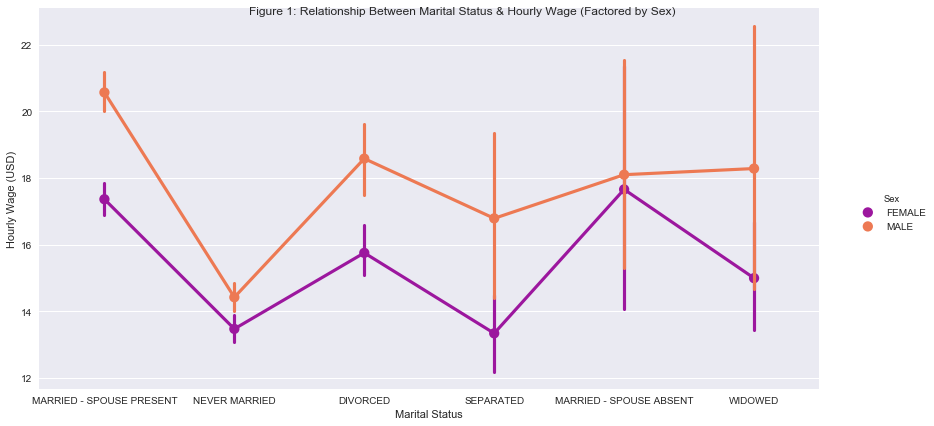

In [277]:
%matplotlib inline
fig1 = sns.factorplot(x="pemaritl", y="peernh1o", \
                      hue="Sex", palette= "plasma",data=cps_new, size=6, aspect=2,\
                     margin_titles=True)
fig1.set_xlabels("Marital Status")
fig1.set_ylabels("Hourly Wage (USD)")
fig1.fig.suptitle("Figure 1: Relationship Between Marital Status \
& Hourly Wage (Factored by Sex)");

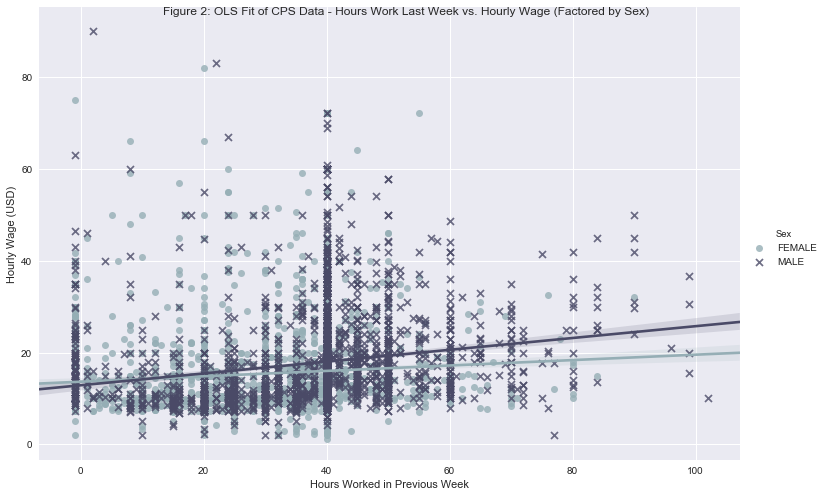

In [278]:
fig2 = sns.lmplot(x="pehractt", y="peernh1o", hue="Sex", data=cps_new,
           markers=["o", "x"], palette="bone_r", size=7, aspect=1.5)
fig2.set_xlabels("Hours Worked in Previous Week")
fig2.set_ylabels("Hourly Wage (USD)")
fig2.fig.suptitle("Figure 2: OLS Fit of CPS Data - Hours Work Last Week vs. \
Hourly Wage (Factored by Sex) ");

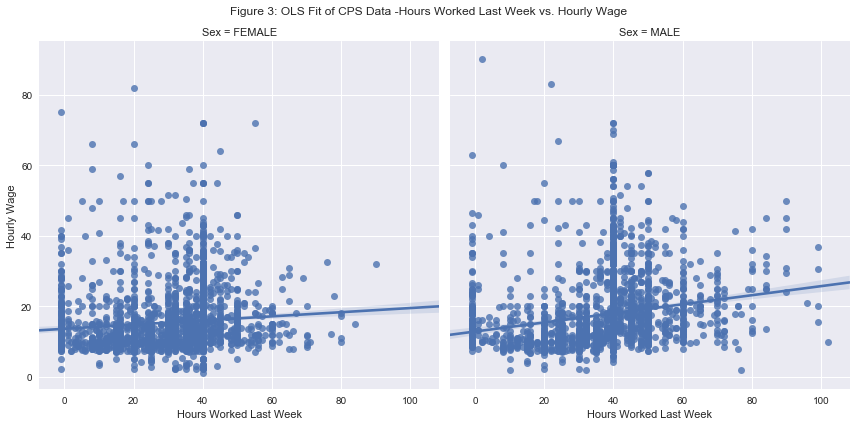

In [279]:
fig3 = sns.lmplot(x="pehractt", y="peernh1o", col="Sex", \
                  data=cps_new, palette="prism", size=6, aspect=1)
fig3.set_xlabels("Hours Worked Last Week")
fig3.set_ylabels("Hourly Wage")
fig3.fig.suptitle("Figure 3: OLS Fit of CPS Data -\
Hours Worked Last Week vs. Hourly Wage")
plt.subplots_adjust(top=0.9);

## Part 2 (Critiquing a Computational Research Paper)

*Boxell, L., Gentzkow, M., & Shapiro, J. M. (2017). Is the internet causing political polarization? Evidence from demographics (No. w23258). National Bureau of Economic Research.*

The authors of this paper sought to study how trends in political polarization relate to respondents’ propensities to obtain news or information online or from social media (2). In other words, the authors wanted to answer the question pertaining to the extent to which political polarization among individuals of different ages is caused by obtaining information from the internet. 

In this study, the authors utilized several sources of survey data from the American National Election Studies’ (ANES) 1948-2012 Time Series Cumulative, 2008 Time Series Study, and 2012 Times Series Study (4). 

Early in the paper, the authors cite studies that attribute trends in polarization to the rise of social media and the internet (2). This theory of internet as the primary driving wedge between individuals of opposing political affiliations and ideologies is one that the authors argue against through their findings in this study. 

Thus, this study is an identification exercise is that it sought to map a relationship between internet/social media use and political polarization. 

To address the previously proposed theory regarding the relationship between internet and polarization, the authors model political polarization through collecting nine measures used in prior work (5). They aimed to recreate the measures as previously proposed but go a step further in constructing on index using these nine measures and normalizing the levels based on 1996 levels. Their findings suggest that other forces beyond the internet and social media may be at play in determining the large increases in political polarization we observe today. In fact, their findings indicate that polarization increases are actually most dramatic among older age groups that have less exposure to and use of the internet and social media. 

One particular suggestion I might provide the authors is to reconsider the placement and use of their equations (for their model) as well as the tables and graphs they include in the appendix. For example, it may have been useful to include Table 1 up within the “Trends in Polarization by demographic group” section so that the findings are readily available for the reader to interpret. Moreover, it may not be necessary to include the definition for each of the nine measures of polarization within the article; I could see the utilize of cutting to the chase, placing those details of the model into the appendix and allowing the reader to proceed to the results more quickly. I might also suggest that authors consider other demographic categories such as race, ethnicity, or income. While, age is certainly a logical and justifiable characteristic to focus on, access to internet and social media is also impacted by my previously mentioned categories. 
